# Explorando e Preparando os Dados

Nesta seção, realizaremos análise exploratória de dados e engenharia de recursos.

# Objetivos
Performar análise exploratória de dados e engenharia de recursos usando Pandas, Matplotlib e Seaborn.

* Análise exploratória de dados
* Preparar dados

In [2]:
import numpy as np
import pandas as pd
# Matplotlib é uma biblioteca de plotagem para python e pyplot nos dá um MatLab como estrutura de plotagem. Usaremos isso em nossa função de plotagem para plotar os dados.
import matplotlib.pyplot as plt
#Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos
import seaborn as sns

## Análise Exploratória de Dados

Primeiro, vamos tentar ver como o FlightNumber (indicando as tentativas contínuas de lançamento) e as variáveis Payload afetariam o resultado do lançamento.

Podemos plotar o FlightNumber vs. PayloadMass e usar o resultado do lançamento como matizador, modificador de cores. Vemos que, à medida que o número de voos aumenta, é mais provável que o primeiro estágio aterrisse com sucesso. A massa da carga também é importante; parece que quanto mais massiva a carga útil, mais provável que o primeiro estágio retorne.

In [4]:
df = pd.read_csv('dataset_part_2.csv')

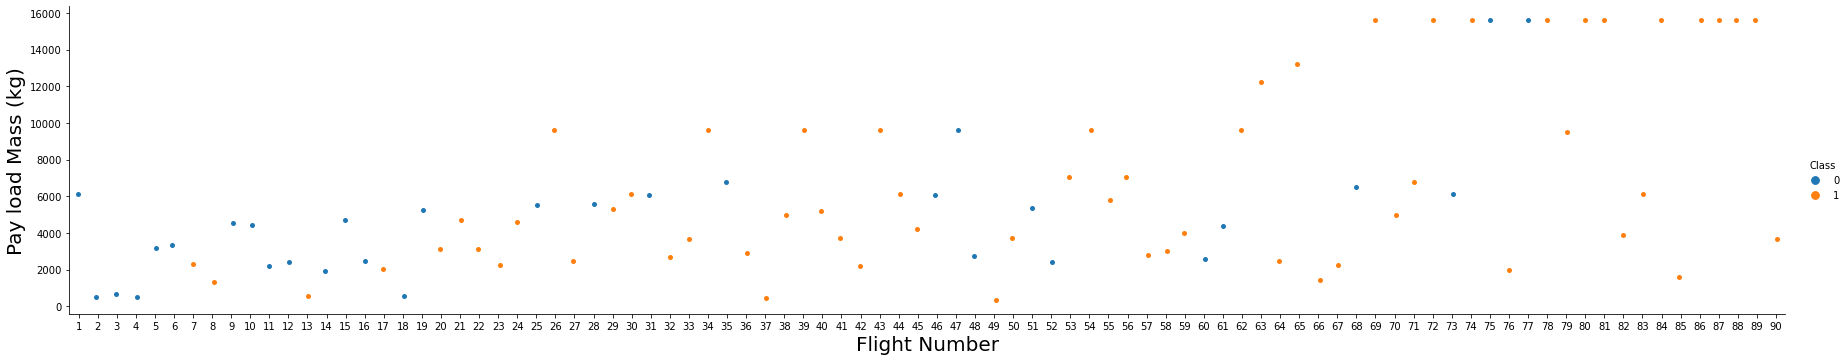

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [6]:
(df[['Class','LaunchSite']].groupby(['LaunchSite']).sum()/df[['Class','LaunchSite']].groupby(['LaunchSite']).count()).apply(lambda x: round(x,2))*100

,Class
LaunchSite,
CCSFS SLC 40,60.0
KSC LC 39A,77.0
VAFB SLC 4E,77.0


Vemos que diferentes locais de lançamento têm diferentes taxas de sucesso. CCAFS LC-40, tem uma taxa de sucesso de 60%, enquanto KSC LC-39A e VAFB SLC 4E tem uma taxa de sucesso de 77%.

Em seguida, vamos detalhar cada site para visualizar seus registros de lançamento detalhados.

Usamos a função catplot para plotar FlightNumber vs LaunchSite, definimos o parâmetro x como FlightNumber, definimos y como Launch Site e definimos o parâmetro hue como 'class'

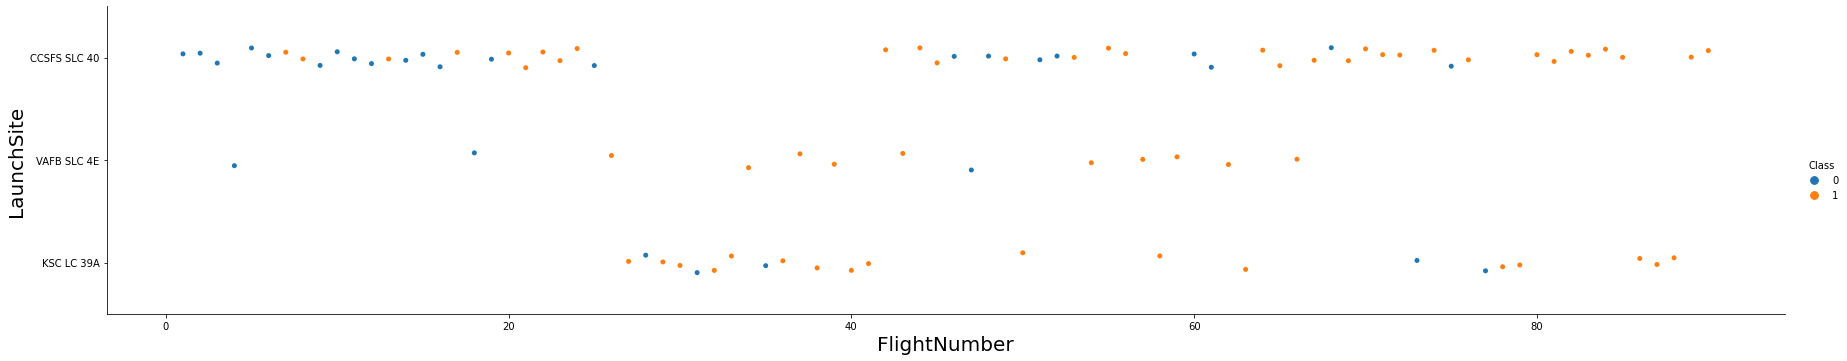

In [7]:
# Plote de um gráfico de dispersão com eixo x sendo o número do voo e eixo y sendo o local de lançamento e hue sendo o valor da classe
sns.catplot(x = 'FlightNumber',y='LaunchSite',hue='Class',data=df,aspect=5)

plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel('LaunchSite',fontsize=20)
plt.show()

No começo eles tiveram dificuldade de acertar, tinham muitos zeros, significando um fracasso. Depois que o número de vôos aumentou eles começaram a pousar corretamente e pararam de cometer grandes erros, desde o voo número 40, as coisas estavam melhores.

In [8]:
# Taxa de sucesso a partir do voo 40
(df.loc[39:,['Class','LaunchSite']].groupby('LaunchSite').sum()/df.loc[39:,['Class','LaunchSite']].groupby('LaunchSite').count()).apply(lambda x: round(x,2))*100

,Class
LaunchSite,
CCSFS SLC 40,75.0
KSC LC 39A,83.0
VAFB SLC 4E,86.0


Também queremos observar se existe alguma relação entre LaunchSites e PayloadMass.

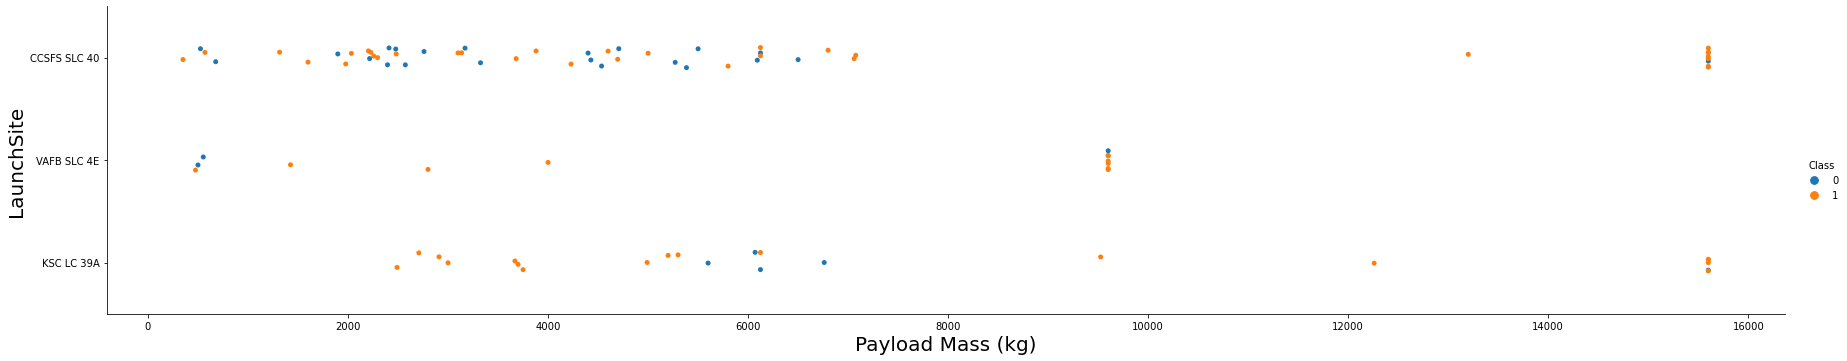

In [9]:
# Plote um gráfico de dispersão com eixo x para ser Pay Load Mass (kg) e eixo y para ser o LaunchSite e matiz para ser o valor da classe
sns.catplot(x='PayloadMass',y='LaunchSite',hue='Class',data=df,aspect=5)

plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('LaunchSite',fontsize=20)

plt.show()

Agora, se você observar o Gráfico de dispersão Payload vs.  LaunchSite, você encontrará para o local de lançamento do VAFB-SLC, não há foguetes lançados para massa de carga pesada (maior que 10.000).

In [10]:
# Taxa de Sucesso para payload maior que 10000
round(df[df['PayloadMass']>10000]['Class'].sum()/df[df['PayloadMass']>10000]['Class'].count(),3)

0.867

Em seguida, queremos verificar visualmente se existe alguma relação entre a taxa de sucesso e o tipo de órbita.

Vamos criar um gráfico de barras para a taxa de sucesso de cada órbita

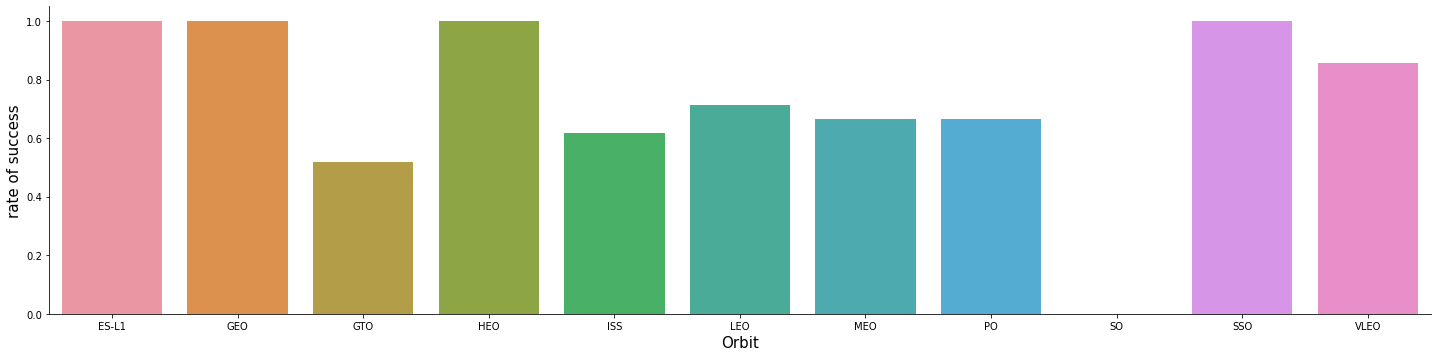

In [11]:
mean_orbit = df[['Class','Orbit']].groupby(['Orbit']).mean().reset_index()
sns.catplot(kind='bar',x='Orbit',y='Class',data=mean_orbit,aspect=4)
plt.ylabel('rate of success', fontsize=15)
plt.xlabel('Orbit',fontsize=15)

plt.show()

As órbitas de mais sucesso são ES-L1, GEO, HEO, SSO, porém GEO, HEO e ES-L1 têm apenas 1 lançamento. A SSO tem 5 lançamentos

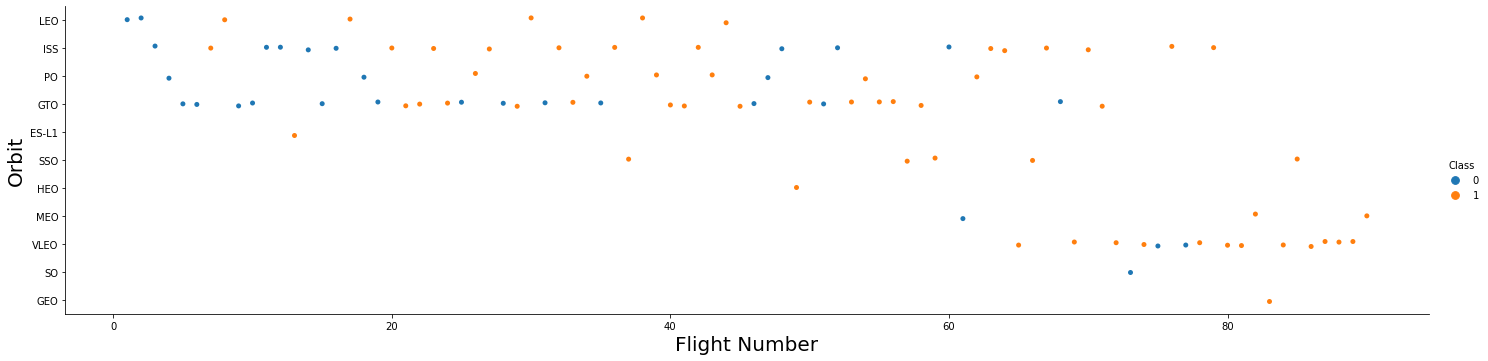

In [12]:
#Para cada órbita, queremos ver se existe alguma relação entre FlightNumber e tipo de órbita.
sns.catplot(x='FlightNumber',y='Orbit',hue='Class',data=df,aspect=4)

plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Orbit',fontsize=20)

plt.show()

Pode-se ver que na órbita LEO o Sucesso aparece relacionado ao número de voos; por outro lado, parece não haver relação entre o número do voo quando em órbita GTO.

Da mesma forma, podemos plotar os gráficos de dispersão de carga X órbita para revelar a relação entre PayloadMass e o tipo de órbita

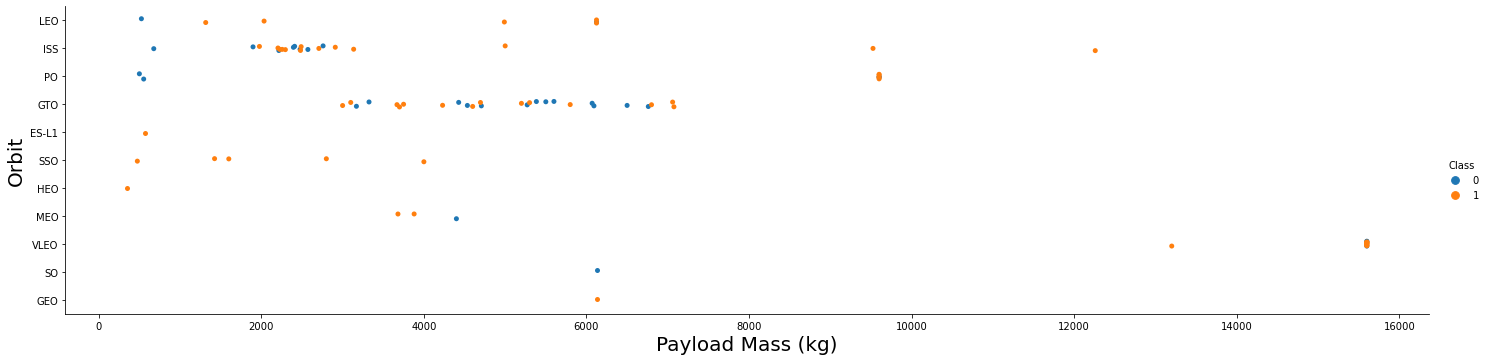

In [13]:
sns.catplot(x='PayloadMass',y='Orbit',hue='Class',data=df,aspect=4)

plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Orbit',fontsize=20)

plt.show()

Com cargas pesadas, a aterrissagem bem-sucedida ou a taxa de aterrissagem positiva são maiores para Polar, LEO e ISS.

No entanto, para GTO, não podemos distinguir isso bem, pois tanto a taxa de pouso positiva quanto a aterrissagem negativa (missão malsucedida) estão aqui.

In [14]:
# Função para extrair ano das datas
year=[]
def Extract_year(df):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

<AxesSubplot:xlabel='Year', ylabel='Class'>

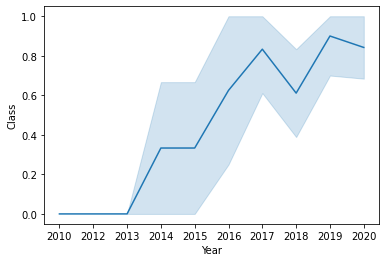

In [15]:
# Plotar um gráfico de linha com o eixo x sendo o Ano e o eixo y sendo a taxa de sucesso.
years = Extract_year(df)
df['Year'] = years

sns.lineplot(data=df,x='Year',y='Class')

Observamos que a taxa de sucesso cresce de 2013 até 2017

# Engenharia de Recursos

Até agora, obtivemos alguns insights preliminares sobre como cada variável importante afetaria a taxa de sucesso, selecionaremos os recursos que serão usados na previsão de sucesso no módulo futuro.

In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Usaremos a função get_dummies e features dataframe para aplicar OneHotEncoder à coluna Orbits, LaunchSite, LandingPad e Serial. Atribuirmos o valor à variável features_one_hot, exibibremos os resultados usando o método head.

In [17]:
features_one_hot = pd.get_dummies(features)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,True,True,True,5.0,13,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,True,True,True,5.0,12,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0


Agora que nosso dataframe features_one_hot contém apenas números, converteremos todo o dataframe para o tipo de variável float64

In [18]:
features_one_hot = features_one_hot.astype('float64')

In [19]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [20]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)